# 导包

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

# 加载数据

In [2]:
# 加载人脸数据，labled faces wild
data = datasets.fetch_lfw_people(resize=1,min_faces_per_person=70)
X = data['data']
y = data['target']
faces = data['images']
display(X.shape,faces.shape,y.shape)
target_names = data['target_names']
target_names

(1288, 11750)

(1288, 125, 94)

(1288,)

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [3]:
len(target_names)

7

Tony Blair


(125, 94)

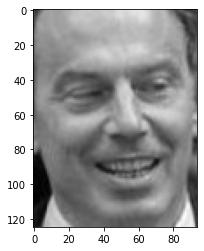

In [4]:
index = np.random.randint(0,1288,size = 1)[0]
face = X[index].reshape(125,94)
name = y[index] # 根据索引获取，名字

print(target_names[name])

display(face.shape)
plt.imshow(face,cmap = 'gray')

# 建模

In [ ]:
# %%time
# X_train,X_test,y_train,y_test = train_test_split(X,y)

# svc = SVC(C = 1)

# svc.fit(X_train,y_train)

# scv.score(X_test,y_test)

In [9]:
%%time
# 进行数据的降维
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
display(X.shape,X_pca.shape)

CPU times: user 24.3 s, sys: 2.05 s, total: 26.3 s
Wall time: 3.86 s


(1288, 224)

In [6]:
%%time
# 降维之后的数据
X_train,X_test,y_train,y_test = train_test_split(X_pca,y)
# 参数C惩罚项，越大，容忍错误就会越小
# C越大，趋势：想发设发，把数据分开
# 造成过拟合
svc = SVC(C = 1)
svc.fit(X_train,y_train)
print('训练数据的得分：',svc.score(X_train,y_train))
print('测试数据的得分：',svc.score(X_test,y_test))

训练数据的得分： 0.9585921325051759
测试数据的得分： 0.7142857142857143
CPU times: user 310 ms, sys: 3.25 ms, total: 314 ms
Wall time: 313 ms


In [7]:
%%time
# 降维之后的数据
X_train,X_test,y_train,y_test = train_test_split(X_pca,y)
# 参数C惩罚项，越大，容忍错误就会越小
# C越大，趋势：想发设发，把数据分开
# 造成过拟合
svc = SVC(C = 10)
svc.fit(X_train,y_train)
print('训练数据的得分：',svc.score(X_train,y_train))
print('测试数据的得分：',svc.score(X_test,y_test))

训练数据的得分： 1.0
测试数据的得分： 0.8229813664596274
CPU times: user 336 ms, sys: 3.09 ms, total: 339 ms
Wall time: 337 ms


# 筛选合适的参数

In [8]:
%%time
svc = SVC()
params = {'C':np.logspace(-3,3,50),'kernel':['rbf','poly','linear'],'tol':[0.01,0.001,0.0001]}
gc = GridSearchCV(estimator = svc,param_grid = params,cv = 5)
gc.fit(X_pca,y)

CPU times: user 5min 20s, sys: 322 ms, total: 5min 20s
Wall time: 5min 53s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2.120950...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         'kernel': ['rbf', 'poly', 'linear'],
                         'tol': [0.01, 0.001, 0.0001]})

In [10]:
gc.best_params_

{'C': 0.001, 'kernel': 'linear', 'tol': 0.0001}

# 使用最佳条件建模

In [11]:
svc = SVC(C = 0.001,kernel='linear',tol = 0.01)

# X <---> X_pca
# X <---> faces 都表示数据，shape不同，数据一样
# faces <---> X_pca
# X_pca降维之后的数据，不可显示
# 随机划分的
X_pca_train,X_pca_test,y_train,y_test, faces_train,faces_test = train_test_split(X_pca,y,faces)

svc.fit(X_pca_train,y_train)

print('训练数据得分：',svc.score(X_pca_train,y_train))
print('测试数据的得分：',svc.score(X_pca_test,y_test))

训练数据得分： 1.0
测试数据的得分： 0.8167701863354038


In [12]:
svc = SVC(C = 150,kernel='rbf',tol = 0.0001)

# X <---> X_pca
# X <---> faces 都表示数据，shape不同，数据一样
# faces <---> X_pca
# X_pca降维之后的数据，不可显示
X_pca_train,X_pca_test,y_train,y_test, faces_train,faces_test = train_test_split(X_pca,y,faces)

svc.fit(X_pca_train,y_train)

print('训练数据得分：',svc.score(X_pca_train,y_train))
print('测试数据的得分：',svc.score(X_pca_test,y_test))

训练数据得分： 1.0
测试数据的得分： 0.8136645962732919


# 进行可视化

In [13]:
svc = SVC(C = 0.001,kernel='linear',tol = 0.01)

# X <---> X_pca
# X <---> faces 都表示数据，shape不同，数据一样
# faces <---> X_pca
# X_pca降维之后的数据，不可显示
# 随机划分的
X_pca_train,X_pca_test,y_train,y_test, faces_train,faces_test = train_test_split(X_pca,y,faces)

svc.fit(X_pca_train,y_train)

print('训练数据得分：',svc.score(X_pca_train,y_train))
print('测试数据的得分：',svc.score(X_pca_test,y_test))

# 算法的预测值
y_pred = svc.predict(X_pca_test)

训练数据得分： 1.0
测试数据的得分： 0.8416149068322981


In [15]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

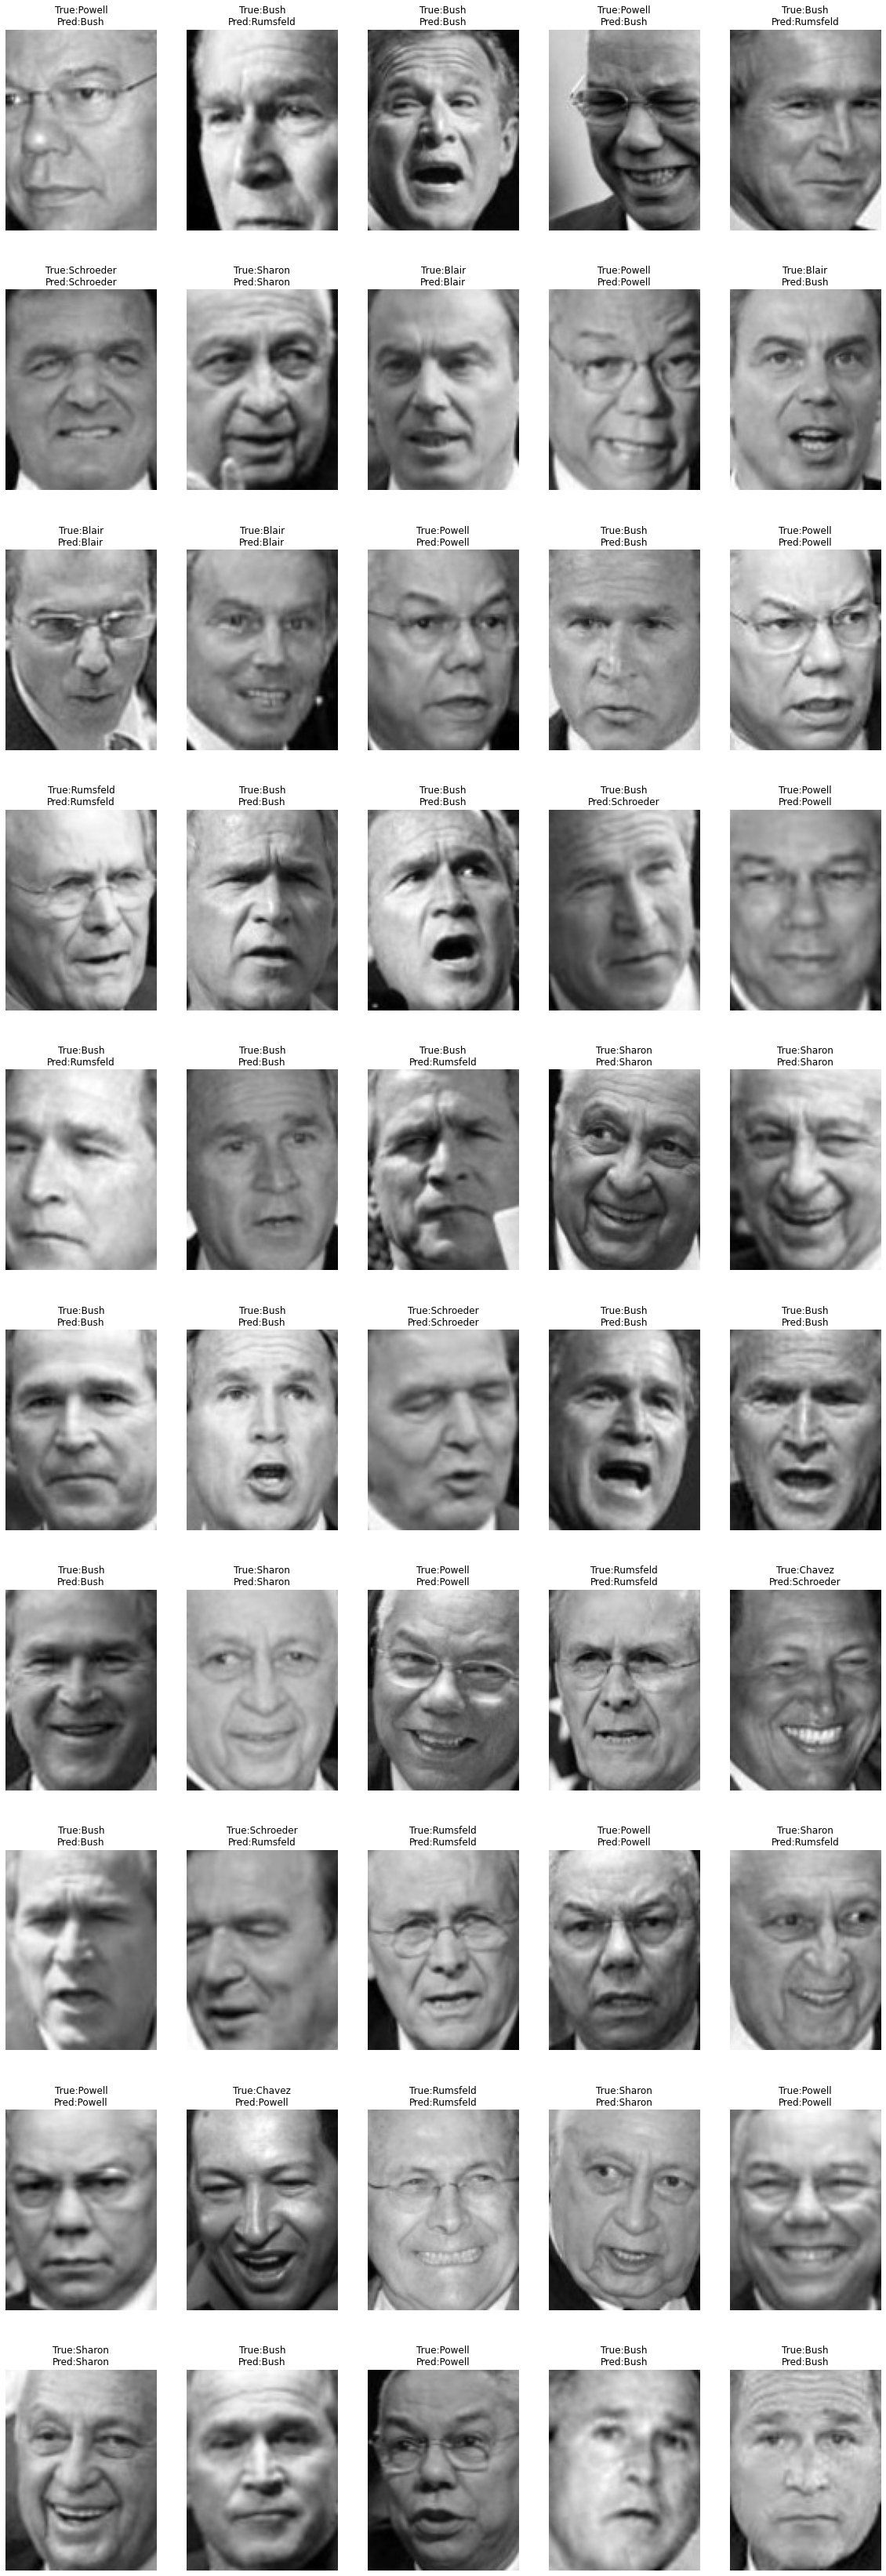

In [17]:
plt.figure(figsize=(5 * 4, 10 * 6))
for i in range(50):
    plt.subplot(10,5,i + 1) # 子视图
    plt.imshow(faces_test[i],cmap = 'gray')
    plt.axis('off') # 刻度关闭
    # 是数字
    true_name = target_names[y_test[i]].split(' ')[-1]
    predict_name = target_names[y_pred[i]].split(' ')[-1]
    plt.title('True:%s\nPred:%s' % (true_name,predict_name))